In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
from patsy import dmatrices
from sklearn.model_selection import train_test_split
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
import plotly.express as px 

In [3]:
dss=pd.read_csv('C:\\Users\\Lenovo\\Desktop\\Programming stuffs\\DataSets\\ds_salaries.csv')

In [4]:
dss_head=dss.head()
dss_head

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [5]:
dss.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [6]:
dss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [7]:
dss.salary_currency.unique()

array(['EUR', 'USD', 'GBP', 'HUF', 'INR', 'JPY', 'CNY', 'MXN', 'CAD',
       'DKK', 'PLN', 'SGD', 'CLP', 'BRL', 'TRY', 'AUD', 'CHF'],
      dtype=object)

In [8]:
dss.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [9]:
dss_col=dss.columns.str.upper()
dss_col

Index(['UNNAMED: 0', 'WORK_YEAR', 'EXPERIENCE_LEVEL', 'EMPLOYMENT_TYPE',
       'JOB_TITLE', 'SALARY', 'SALARY_CURRENCY', 'SALARY_IN_USD',
       'EMPLOYEE_RESIDENCE', 'REMOTE_RATIO', 'COMPANY_LOCATION',
       'COMPANY_SIZE'],
      dtype='object')

In [10]:
dss.dropna()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


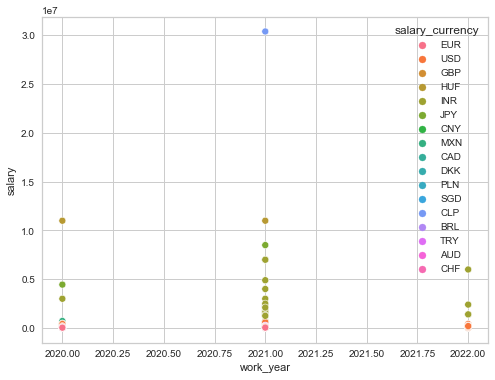

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='work_year', y='salary', data=dss, hue='salary_currency')
plt.show()

In [12]:
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.dpi']=100

In [13]:
dss_head

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


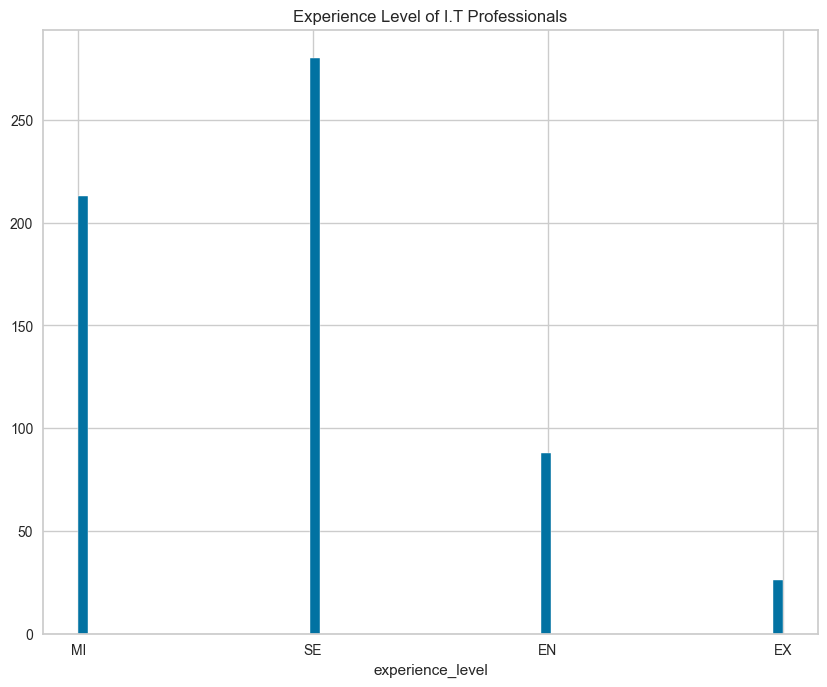

In [14]:
plt.figure(figsize=(10,8))
dss['experience_level'].hist(bins=70)
plt.xlabel('experience_level')
plt.title('Experience Level of I.T Professionals')
plt.show()


<Figure size 600x600 with 0 Axes>

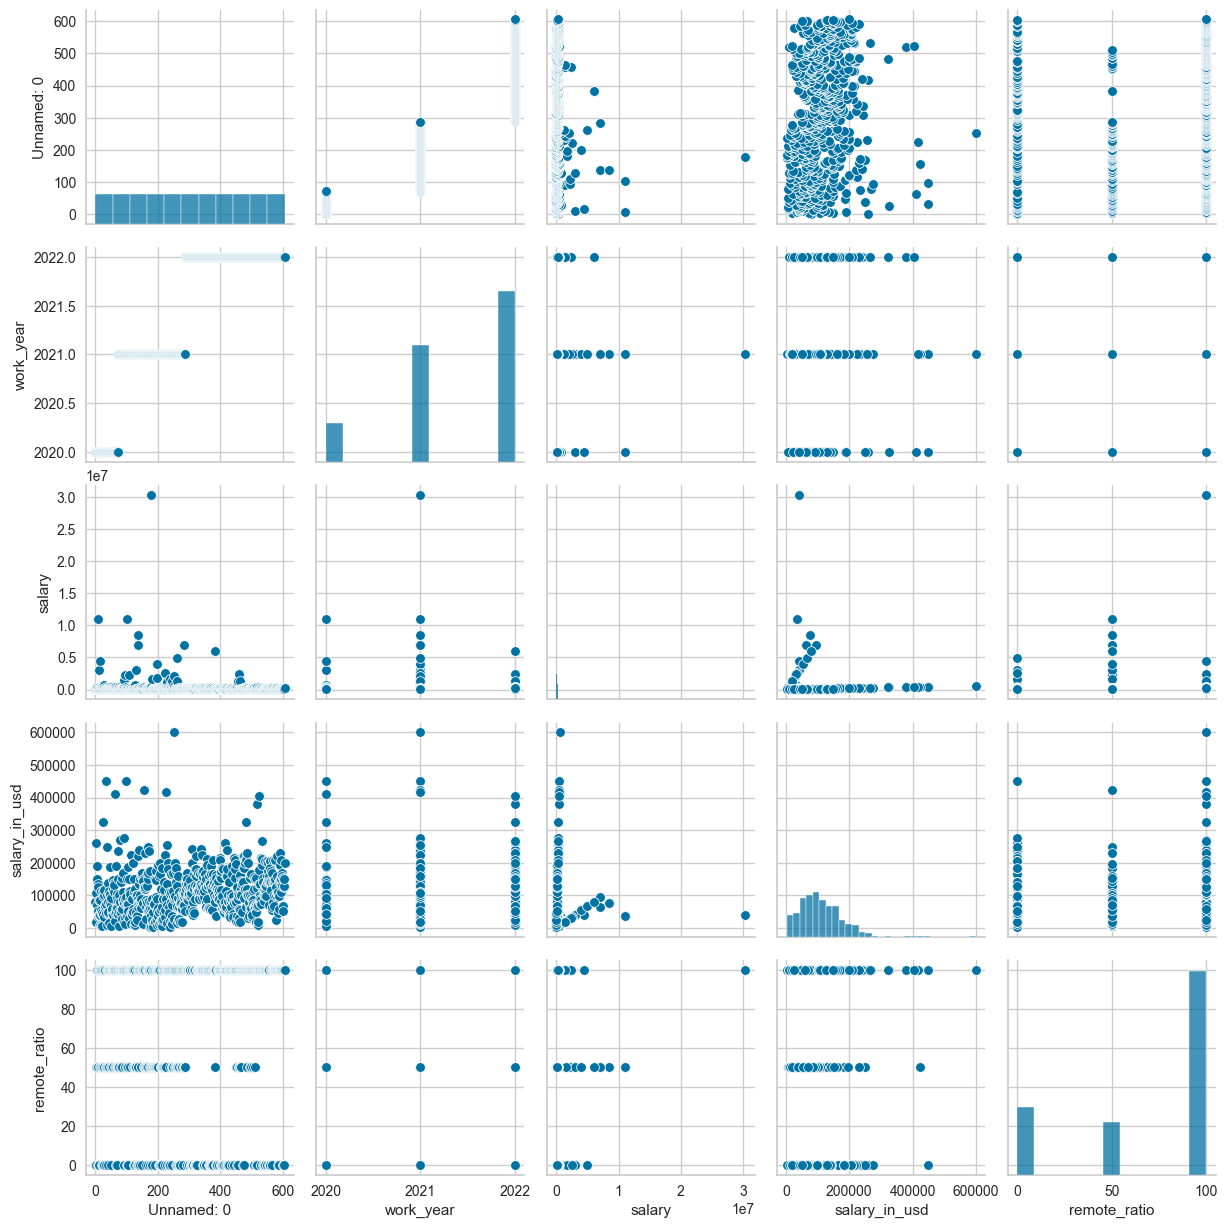

In [15]:
dss['salary'].value_counts()
plt.figure(figsize=(6,6))
sns.pairplot(dss)

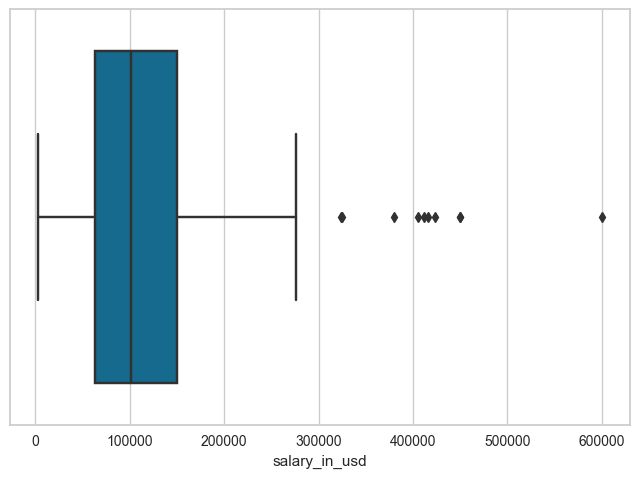

In [16]:
sns.boxplot(x=dss.salary_in_usd)
plt.show()

In [17]:
int_cols=dss.columns
int_cols

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [18]:
def data_outliers(x,fig):
      plt.subplot(2,2,fig)
      plt.title('Outliers of' + x)
      sns.boxplot(x=dss['x'], palette=('Wistia'))
      plt.xtick(rotation= 90)
      plt.figure(figsize=(12,6))
      for e, i in enumerate(int_cols):
            data_outliers(i,e+1)

plt.tight_layout()
plt.show();

<Figure size 800x550 with 0 Axes>

In [19]:
dss.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


<AxesSubplot:>

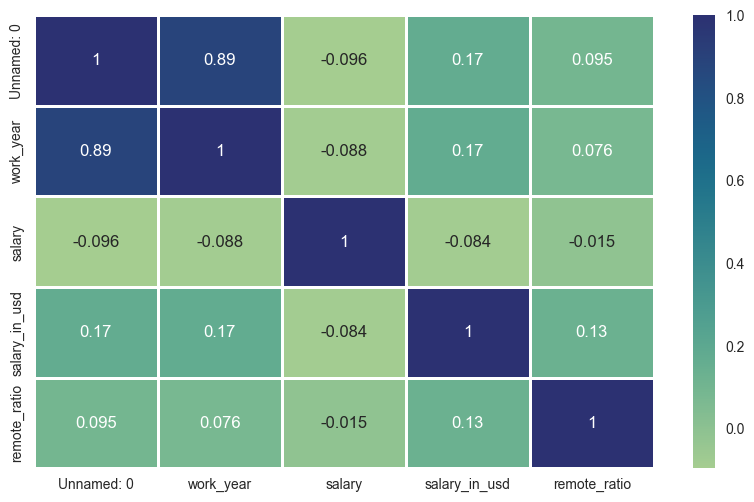

In [20]:
ax=plt.figure(figsize=(10,6))
sns.heatmap(dss.corr(),linewidths=1,linecolor='white',annot=True,cmap='crest')

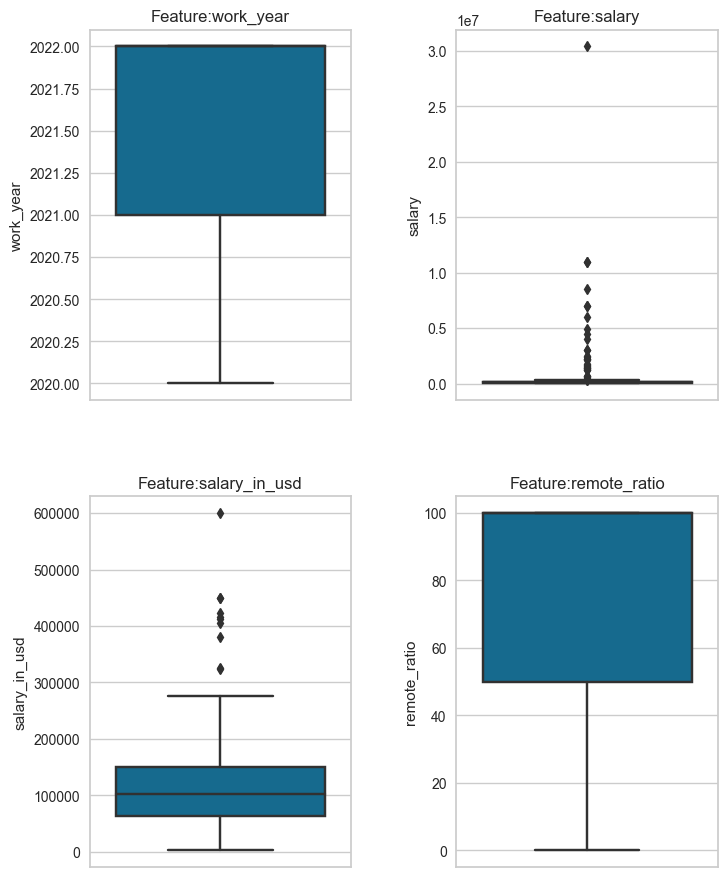

In [21]:
features = ['work_year', 'salary', 'salary_in_usd', 'remote_ratio']
fig, axs = plt.subplots(2, 2, figsize=(8,10))
fig.tight_layout(pad=4.0)

for f, ax in zip(features,axs.ravel()):
      ax=sns.boxplot(ax=ax,data=dss,y=dss[f])
      ax.set_title('Feature:'+ f)

In [22]:
dss.corr()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
Unnamed: 0,1.000000,0.886550,-0.096250,0.167025,0.095000
work_year,0.886550,1.000000,-0.087577,0.170493,0.076314
salary,-0.096250,-0.087577,1.000000,-0.083906,-0.014608
salary_in_usd,0.167025,0.170493,-0.083906,1.000000,0.132122
remote_ratio,0.095000,0.076314,-0.014608,0.132122,1.000000


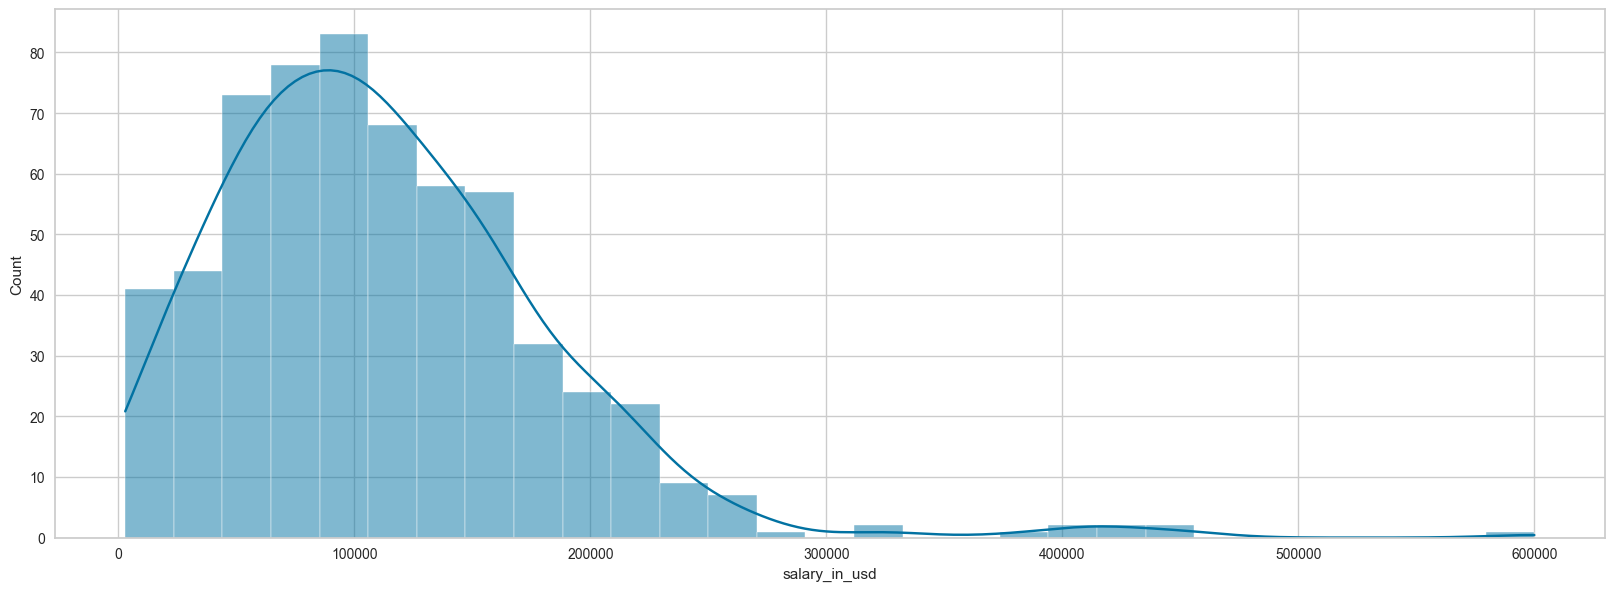

In [23]:
plt.figure(figsize=(20,7))
sns.histplot(dss.salary_in_usd, kde=True)
plt.show()

In [24]:
dss_head

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [25]:
dss_drop = dss.drop(['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size'], axis=1)
dss_drop

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
0,0,2020,70000,79833,0
1,1,2020,260000,260000,0
2,2,2020,85000,109024,50
3,3,2020,20000,20000,0
4,4,2020,150000,150000,50
...,...,...,...,...,...
602,602,2022,154000,154000,100
603,603,2022,126000,126000,100
604,604,2022,129000,129000,0
605,605,2022,150000,150000,100


In [26]:
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters=5, random_state=1)
kmeans.fit(dss_drop)
dss_drop['kmeans']=kmeans.labels_

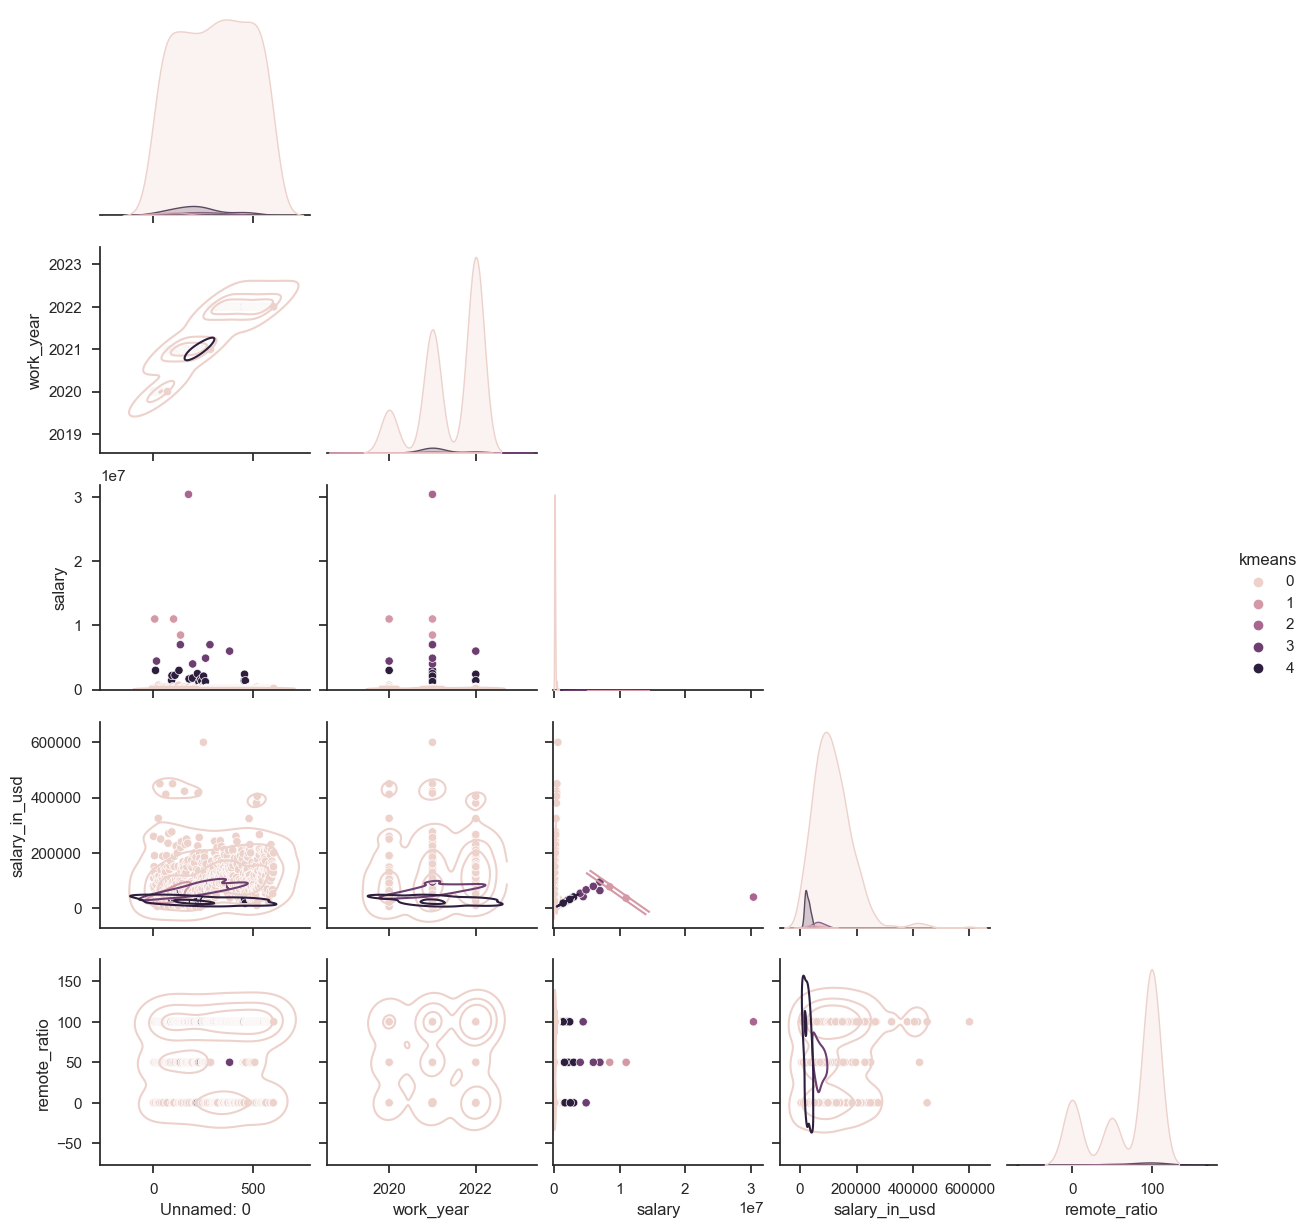

In [27]:
sns.set_theme(style='ticks')
g=sns.pairplot(dss_drop, hue='kmeans', diag_kind='kde', corner=True)
g.map_lower(sns.kdeplot, levels=4, color='.5')
plt.show()

In [28]:
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

x=dss_drop
scaler = StandardScaler()
def multicol(x):
      scaler = StandardScaler()
      arr = scaler.fit_transform(x)
      return pd.DataFrame([[x.columns[i], variance_inflation_factor(arr, i)] for i in range(x.shape[-1, 1])], columns=['Features', 'VIF'])

In [29]:
fig = px.parallel_coordinates(dss, labels={'kmeans': 'Clusters', 'salary': 'salary', 'salary_in_usd': 'salary_in_usd', 'salary_currency': 'salary_currency'}, color_continuous_scale=px.colors.sequential.Plotly3, color_continuous_midpoint=3)
fig.show()

In [30]:
dss.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [41]:
plt.figure(figsize=(10,8))
fig = px.pie(dss, values='salary', names='job_title', title='Job Title and Salary', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

<Figure size 1000x800 with 0 Axes>

In [32]:
dss.job_title.value_counts()
dss.salary.value_counts()

100000     18
80000      18
120000     15
60000      15
150000     14
           ..
256000      1
39600       1
1335000     1
52500       1
129000      1
Name: salary, Length: 272, dtype: int64

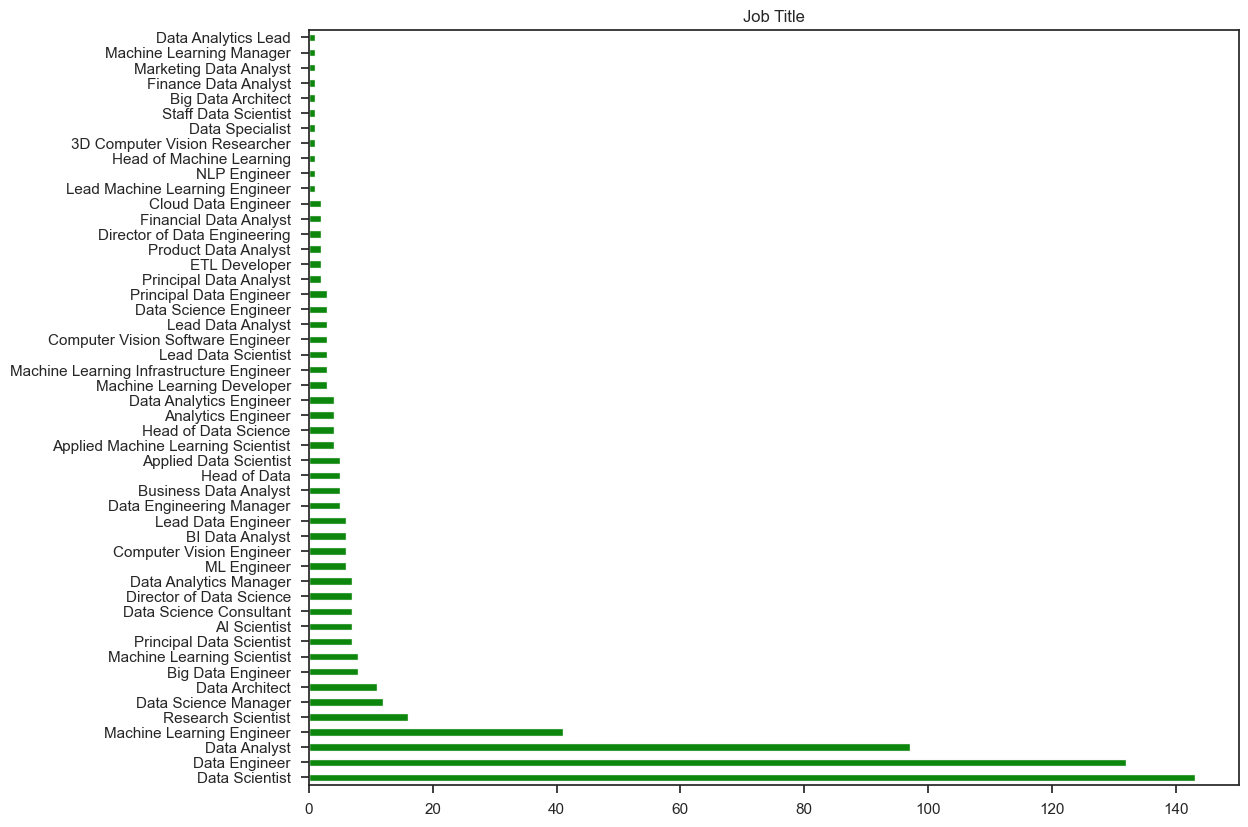

In [33]:
from turtle import color


plt.figure(figsize=(12,10))
dss.job_title.value_counts().plot(kind='barh',color='green', alpha=.95)
plt.title('Job Title')
plt.show()

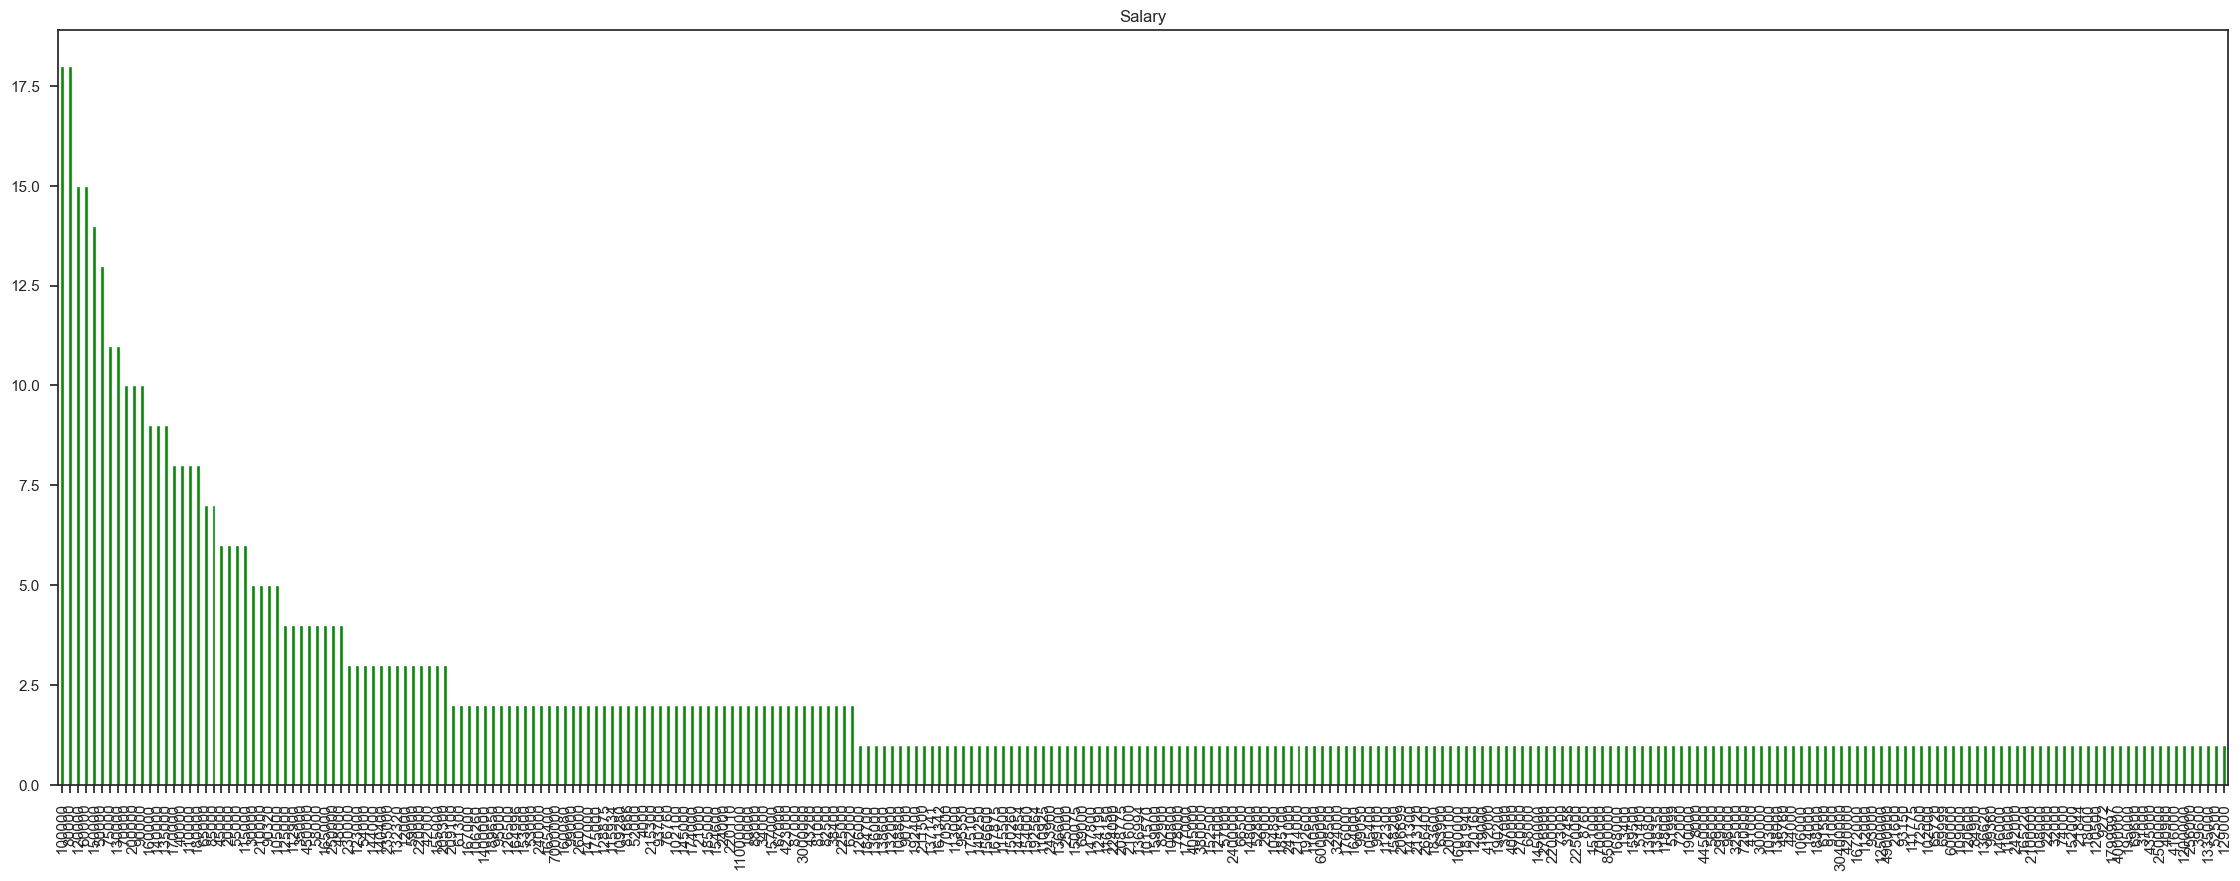

In [34]:
plt.figure(figsize=(28,10))
dss.salary.value_counts().plot(kind='bar',color='green', alpha=.95)
plt.title('Salary')
plt.show()

In [35]:
dss.notnull()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
602,True,True,True,True,True,True,True,True,True,True,True,True
603,True,True,True,True,True,True,True,True,True,True,True,True
604,True,True,True,True,True,True,True,True,True,True,True,True
605,True,True,True,True,True,True,True,True,True,True,True,True


In [36]:
s_count = dss.salary.value_counts()
j_count = dss.job_title.value_counts()
print(s_count)
print(j_count)


100000     18
80000      18
120000     15
60000      15
150000     14
           ..
256000      1
39600       1
1335000     1
52500       1
129000      1
Name: salary, Length: 272, dtype: int64
Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                       

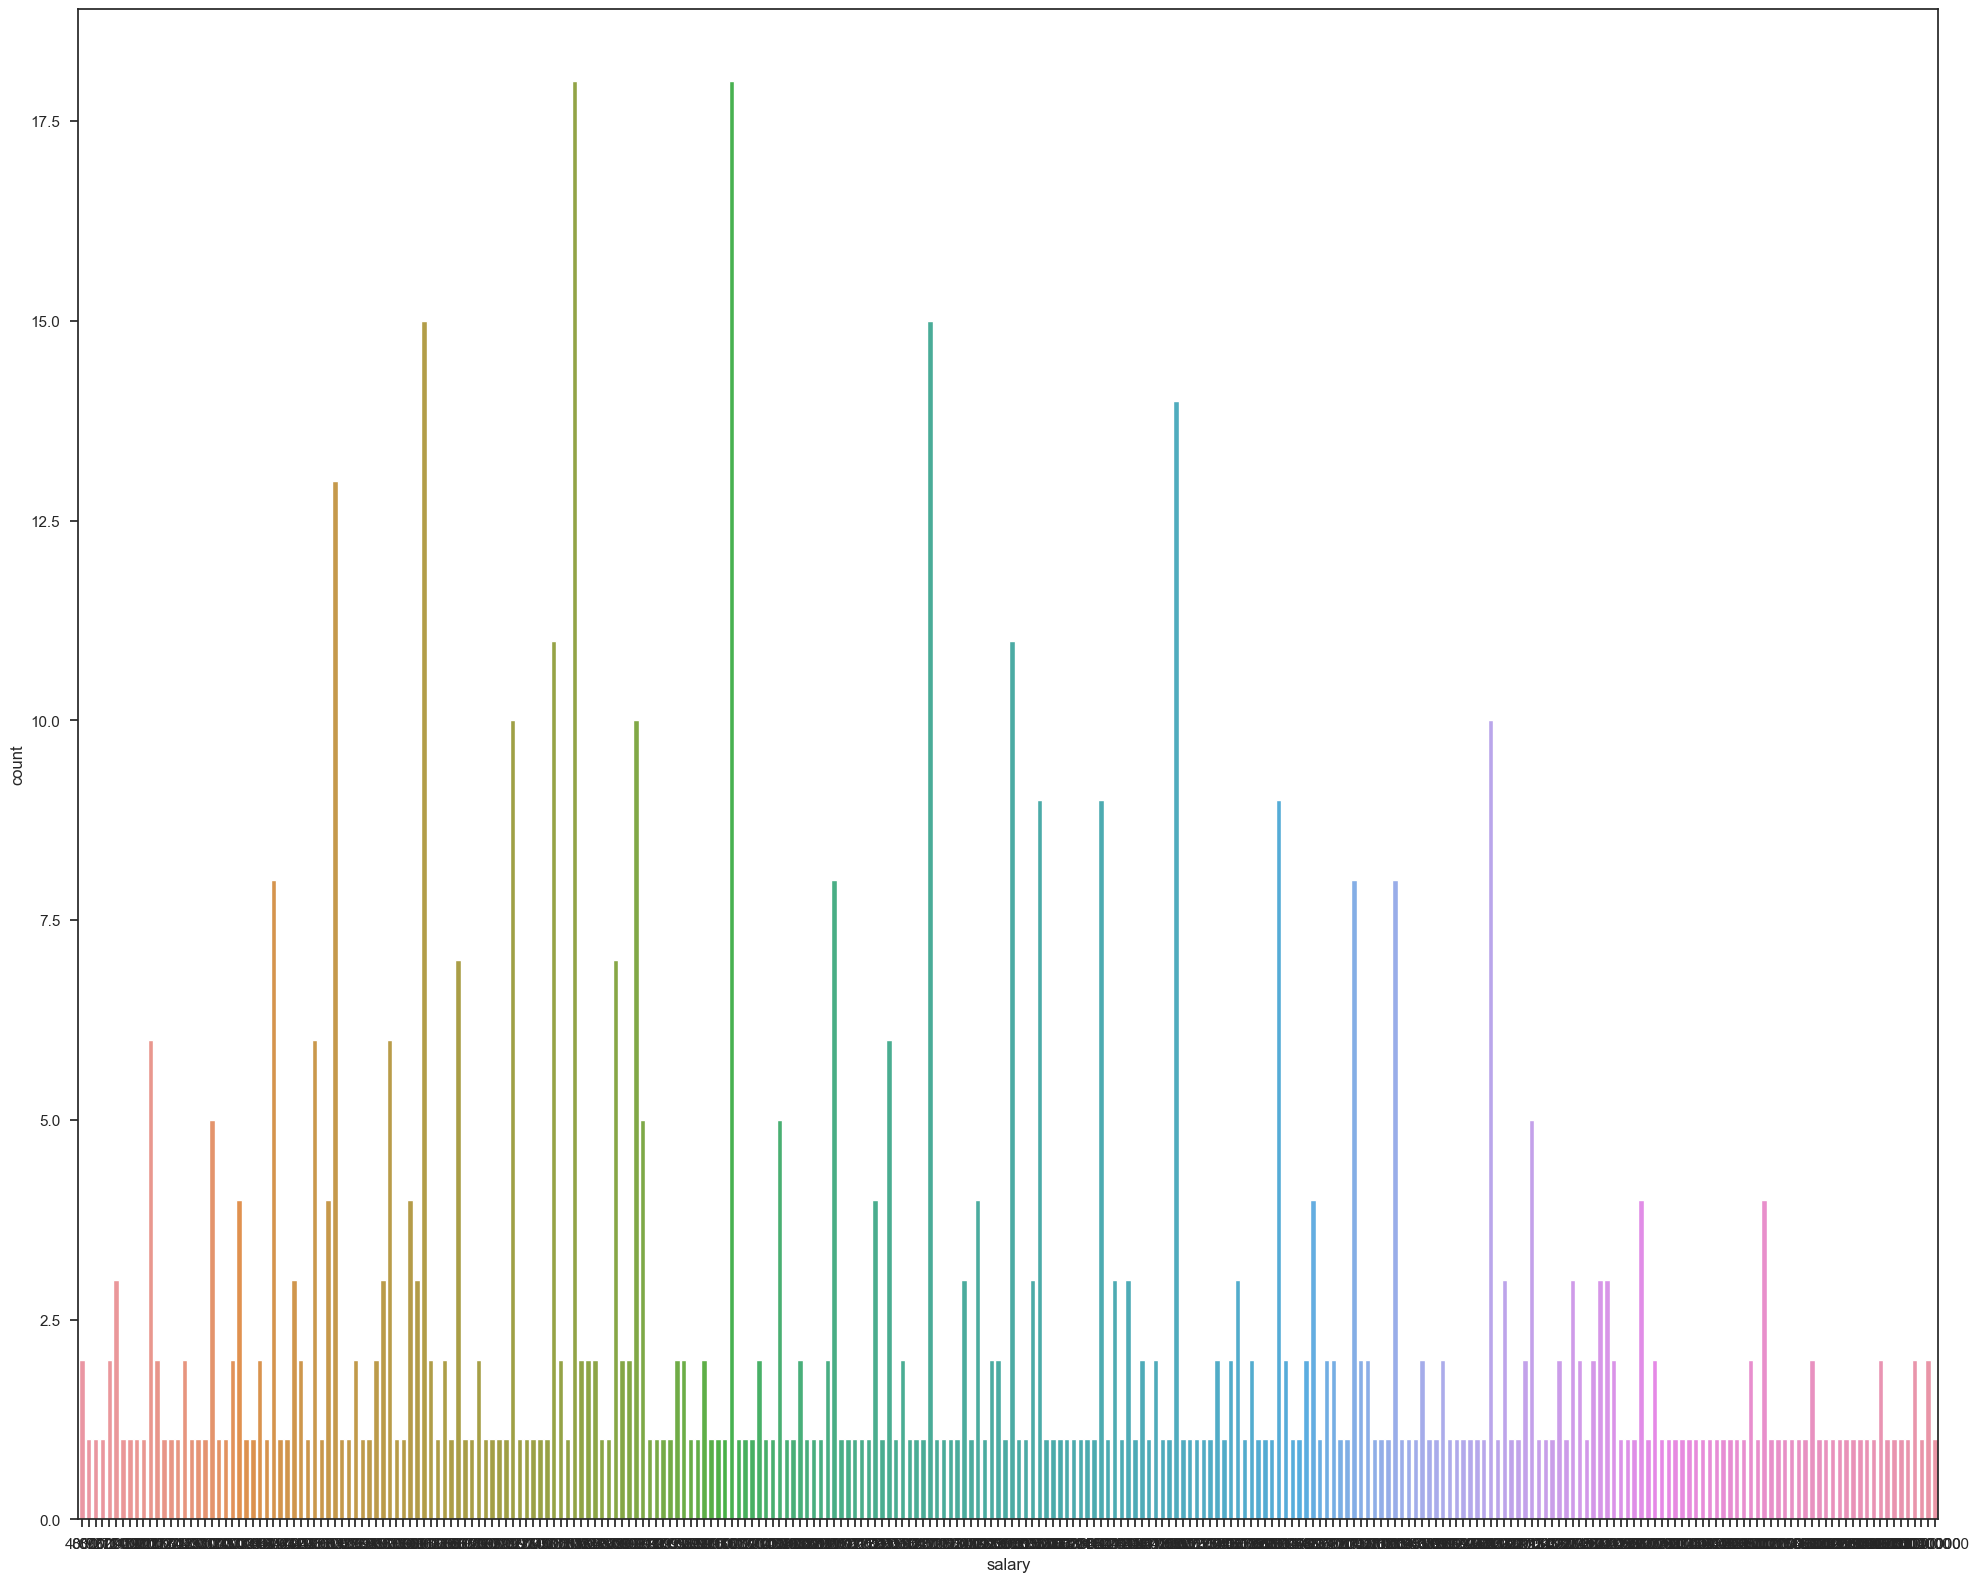

In [37]:
plt.figure(figsize=(24,20))
ax=sns.countplot(x=dss['salary'])
plt.show()

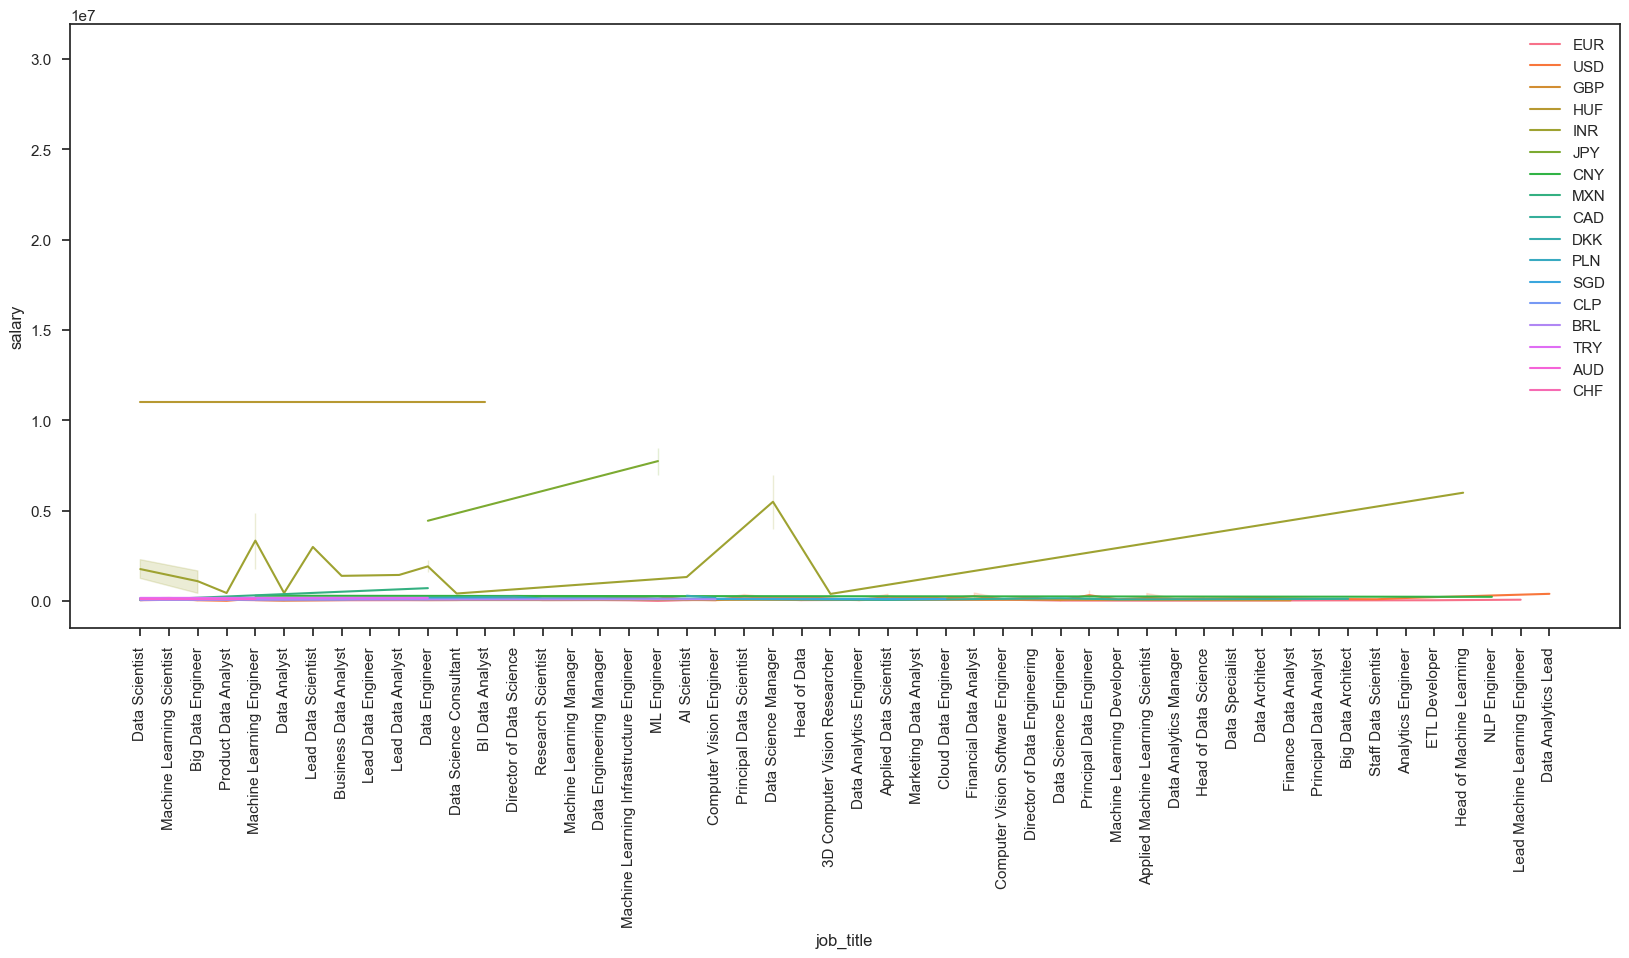

In [38]:
plt.figure(figsize=(20,8))
sns.lineplot(data=dss, x='job_title', y='salary', hue='salary_currency')
plt.xticks(rotation= 90)
plt.legend()
plt.show()

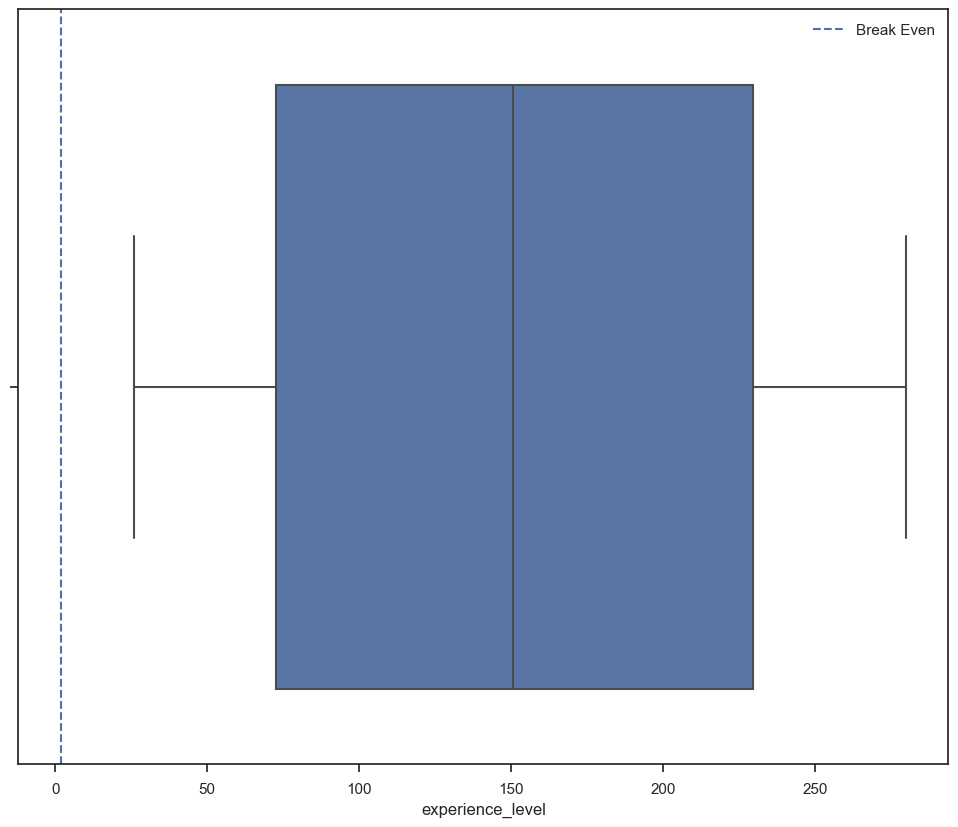

In [39]:
plt.figure(figsize=(12,10))
ax = sns.boxplot(dss.experience_level.value_counts())
ax.axvline(x=1.75, label='Break Even', linestyle='--')
plt.legend()
plt.show()

In [40]:
dss.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [50]:
import plotly.graph_objects as go
fig = go.Figure(go.Bar(x = dss['job_title'], y = dss['salary'],))
fig.update_layout(title = 'JOB TITLE AS AGIANST SALARY')
fig.show()